In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
parameters = {
    "number_nodes": 1882, 
    "radius": [15, 2], 
    "diameter": [28, 4], 
    "average_clustering": [0.005066798238955518, 0.001], 
    "average_path_length": [11.748410823170731, 2], 
    "number_cc": [168, 32], 
    "degree_cdf": [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 24, 46], 
                   [0.0, 0.6902231668437833, 0.8517534537725824, 0.9086078639744952, 0.9378320935175345, 0.9516471838469713, 0.9654622741764081, 
                    0.9723698193411264, 0.9776833156216791, 0.9808714133900106, 0.9845908607863975, 0.9888416578108395, 0.9893730074388948, 
                    0.9925611052072264, 0.9936238044633369, 0.9952178533475027, 0.9957492029755579, 0.9968119022316685, 0.997874601487779, 
                    0.9989373007438895, 0.9994686503719448, 1.0]]
         }

In [4]:
#X is degree
X = np.array(parameters['degree_cdf']).T[:,0]
Y = np.array(parameters['degree_cdf']).T[:,1]
P = Y[1:] - Y[:-1] 

D = X[1:]

D_N = np.array([D,(np.array(P) * 1882).tolist()]).T 
seq = np.concatenate([np.repeat(D_N[i,0],int(round(D_N[i,1]))) for i in range(D_N.shape[0])])
seq = [int(seq[i]) for i in range(len(seq))]



In [5]:
G = nx.random_degree_sequence_graph(seq, seed = 0)
cc = list(nx.connected_components(G))
max_cc = max(cc,key=len)
cc_3 = [i for i in cc if len(i) == 3]
for v in cc_3[0]:
    for u in cc_3[0]:
        if v > u :
            G.add_edge(v,u)

for v in cc_3[1]:
    for u in cc_3[1]:
        if v > u :
            G.add_edge(v,u)

for v in cc_3[2]:
    for u in cc_3[2]:
        if v > u :
            G.add_edge(v,u)
            
            

            
sort_cc = sorted(cc, key =len)
sort_cc_l = [list(i) for i in sort_cc]

In [6]:
G = nx.configuration_model(seq, create_using=nx.Graph, seed=0)
G0 = G.subgraph(max(nx.connected_components(G),key=len))
g = [np.sum(list(nx.shortest_path_length(G0, source=i).values())) for i in G0.nodes]

In [7]:
G0 = G.subgraph(max(nx.connected_components(G), key=len)).copy()
cc = sorted(nx.connected_components(G), key=len)


In [8]:
l = []
for i in G0.nodes:
    try:
        len_ = np.array(list(nx.single_source_shortest_path_length(G0,i).values()))
        j = np.array(list(nx.single_source_shortest_path_length(G0,i).keys()))
        l.append([len_[len_==17][0] , i])
    except:
        continue

In [9]:
l

[[17, 131],
 [17, 200],
 [17, 212],
 [17, 226],
 [17, 277],
 [17, 328],
 [17, 783],
 [17, 949],
 [17, 969],
 [17, 1293]]

In [10]:
d = [list(i) for  i in cc if (len(i) != 3) & (len(i) <= 4)][::-1]

In [11]:
v = np.array(l)[:,1].tolist()
for i in range(10):
    G.add_edge(v[i],d[i][0])

In [12]:
#G0 = G.subgraph(max(nx.connected_components(G), key=len)).copy()
#print(nx.average_clustering(G))
#print(nx.diameter(G0))
#print(nx.radius(G0))
#print(nx.average_shortest_path_length(G0))
#print(nx.number_connected_components(G))

In [13]:
cc = sorted(nx.connected_components(G), key=len)
[i for i in cc if len(i)==3][:3]

[{1, 204, 1496}, {9, 673, 1494}, {11, 1076, 1465}]

In [14]:
G.add_edge(1293,1136)
G.add_edge(712,511)

In [15]:
#G0 = G.subgraph(max(nx.connected_components(G), key=len)).copy()
#print(nx.average_shortest_path_length(G0))
#print(nx.average_clustering(G))
#print(nx.diameter(G0))
#print(nx.radius(G0))
#print(nx.number_connected_components(G))


In [16]:
for i in range(7,136):
    G.add_edge(sort_cc_l[i][1],sort_cc_l[i+1][0])

In [17]:
cc = list(nx.connected_components(G))
max_cc = max(cc,key=len)
cc_3 = [i for i in cc if len(i) == 3]

In [18]:
for v in cc_3[1]:
    for u in cc_3[1]:
        if v > u :
            G.add_edge(v,u)

In [19]:
G.subgraph(max(nx.connected_components(G), key=len)).degree

DegreeView({0: 1, 3: 1, 5: 1, 6: 1, 7: 1, 12: 1, 13: 2, 14: 2, 15: 2, 16: 1, 17: 1, 18: 2, 19: 2, 20: 1, 21: 2, 22: 1, 23: 2, 24: 2, 25: 2, 26: 1, 27: 2, 31: 1, 32: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 1, 45: 2, 46: 2, 47: 2, 48: 1, 50: 1, 52: 1, 53: 2, 57: 2, 58: 2, 62: 2, 63: 1, 64: 2, 67: 1, 69: 1, 71: 1, 74: 1, 77: 1, 78: 1, 79: 2, 80: 1, 81: 2, 82: 2, 83: 1, 85: 1, 86: 1, 87: 2, 89: 2, 90: 2, 92: 1, 93: 2, 94: 1, 95: 2, 96: 2, 97: 1, 99: 1, 100: 2, 104: 1, 105: 1, 106: 2, 108: 1, 109: 1, 110: 1, 112: 1, 113: 1, 115: 1, 117: 1, 118: 2, 119: 1, 120: 2, 122: 2, 123: 1, 124: 2, 126: 1, 127: 2, 128: 1, 130: 2, 131: 3, 132: 1, 133: 1, 134: 2, 135: 2, 138: 2, 139: 1, 141: 1, 142: 1, 145: 1, 146: 2, 147: 1, 148: 2, 150: 1, 151: 2, 153: 2, 154: 1, 155: 1, 156: 1, 159: 1, 161: 2, 162: 2, 163: 1, 164: 1, 166: 2, 167: 1, 168: 1, 169: 1, 170: 1, 171: 1, 173: 1, 174: 2, 176: 1, 177: 2, 178: 2, 179: 1, 180: 1, 181: 1, 183: 2, 184: 1, 185: 2, 186: 1, 187: 1

In [20]:
G.add_edge(8,11)
G.add_edge(460,13)
G.add_edge(1102,124)
G.add_edge(14,120)
G.add_edge(1388,1393)

In [21]:
nx.number_connected_components(G)

210

In [22]:
#print(nx.average_shortest_path_length(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.average_clustering(G))
#print(nx.diameter(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.radius(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.number_connected_components(G))

In [23]:
[i for i in list(nx.connected_components(G)) if (len(i)==3) | (len(i)==2)]

[{1, 204, 1496},
 {2, 858},
 {4, 971},
 {9, 673, 1494},
 {10, 88},
 {28, 520},
 {29, 1271},
 {33, 721},
 {49, 1005},
 {51, 1012},
 {54, 475, 1349},
 {55, 569},
 {56, 763, 1593},
 {59, 630},
 {60, 624},
 {61, 975},
 {68, 643},
 {70, 182},
 {72, 242},
 {73, 738},
 {75, 266},
 {76, 188, 1334},
 {84, 501},
 {91, 944},
 {98, 1148},
 {101, 157},
 {102, 193, 1540},
 {103, 863},
 {107, 259},
 {111, 378},
 {114, 865},
 {116, 129},
 {121, 140},
 {125, 331},
 {136, 1041},
 {137, 1172},
 {143, 1084},
 {144, 1243},
 {152, 496},
 {165, 1044},
 {172, 817},
 {175, 251},
 {192, 1202},
 {198, 1046},
 {205, 655, 1376},
 {207, 715},
 {210, 1279},
 {215, 906},
 {218, 257},
 {219, 645},
 {220, 801},
 {231, 749, 1340},
 {235, 523},
 {239, 732},
 {246, 557},
 {249, 1222},
 {261, 1232},
 {264, 487},
 {267, 615},
 {278, 461},
 {281, 774},
 {283, 790, 1313},
 {287, 506},
 {288, 1054},
 {292, 1178},
 {295, 908},
 {299, 960},
 {313, 970, 1402},
 {316, 886},
 {319, 997},
 {320, 1198},
 {321, 1023},
 {323, 1037},
 {

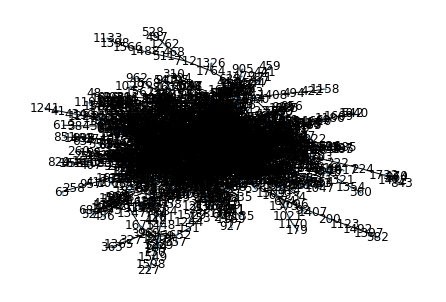

In [24]:
nx.draw(G.subgraph(max((nx.connected_components(G)), key = len)),node_size=1,with_labels = True)

In [25]:
list(G.edges)

[(0, 1804),
 (1, 1496),
 (2, 858),
 (3, 1801),
 (4, 971),
 (5, 1854),
 (6, 1881),
 (7, 1786),
 (8, 745),
 (8, 11),
 (9, 1494),
 (9, 673),
 (10, 88),
 (11, 1465),
 (12, 1845),
 (13, 1826),
 (13, 460),
 (14, 1839),
 (14, 120),
 (15, 1839),
 (15, 18),
 (16, 146),
 (17, 1829),
 (18, 1499),
 (19, 1801),
 (19, 1067),
 (20, 1322),
 (21, 1872),
 (21, 311),
 (22, 1842),
 (23, 1881),
 (23, 24),
 (24, 128),
 (25, 260),
 (25, 106),
 (26, 1449),
 (27, 1707),
 (27, 685),
 (28, 520),
 (29, 1271),
 (30, 649),
 (30, 66),
 (31, 1717),
 (32, 1743),
 (33, 721),
 (34, 914),
 (35, 1564),
 (36, 1864),
 (37, 1876),
 (38, 1866),
 (39, 1851),
 (39, 40),
 (40, 1801),
 (41, 1241),
 (41, 434),
 (42, 683),
 (42, 421),
 (43, 1162),
 (43, 914),
 (44, 1634),
 (45, 1786),
 (45, 949),
 (46, 376),
 (46, 1002),
 (47, 978),
 (47, 714),
 (48, 1658),
 (49, 1005),
 (50, 1391),
 (51, 1012),
 (52, 648),
 (53, 1717),
 (53, 57),
 (54, 1349),
 (55, 569),
 (56, 1593),
 (57, 516),
 (58, 1859),
 (58, 660),
 (59, 630),
 (60, 624),
 (6

In [26]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [27]:
with open('output.txt', 'a') as f:
  for u , v  in G.edges():
    
    f.write(str(u) + " " + str(v))
    f.write('\n')


In [28]:
G.add_edge(522,967)
G.add_edge(567,1214)
G.add_edge(603,1259 )
G.add_edge(562,1237 )
G.add_edge(612,882)
G.add_edge(612,622)


In [29]:
#print(nx.average_shortest_path_length(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.average_clustering(G))
#print(nx.diameter(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.radius(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.number_connected_components(G))

In [30]:
with open('output1.txt', 'a') as f:
  for u , v  in G.edges():
    
    f.write(str(u) + " " + str(v))
    f.write('\n')


In [31]:
 G.add_edge(553,1155)

In [32]:
#print(nx.average_shortest_path_length(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.average_clustering(G))
#print(nx.diameter(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.radius(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.number_connected_components(G))

In [33]:
 G.add_edge(571,973)

In [34]:
G.add_edge(612,882)

In [35]:
G.add_edge(631,692)

In [36]:
G.add_edge(631,692)

In [37]:
G.add_edge(636,1217)

In [38]:
#print(nx.average_shortest_path_length(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.average_clustering(G))
#print(nx.diameter(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.radius(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.number_connected_components(G))

In [39]:
G.add_edge(640,1205)

In [40]:
G.add_edge(661,984)

In [41]:
G.add_edge(670,828)

In [42]:
G.add_edge(678,942)

In [43]:
G.add_edge(708,940)

In [44]:
#print(nx.average_shortest_path_length(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.average_clustering(G))
#print(nx.diameter(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.radius(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.number_connected_components(G))

In [45]:
G.add_edge(710,940)

In [46]:
G.add_edge(708,813)

In [47]:
G.add_edge(748,1215)

In [48]:
G.add_edge(771,860)

In [49]:
G.add_edge(789,1048)

In [50]:
#print(nx.average_shortest_path_length(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.average_clustering(G))
#print(nx.diameter(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.radius(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.number_connected_components(G))

In [51]:
G.add_edge(205,715)

In [52]:
G.add_edge(209,1335)

In [53]:
G.add_edge(211,585)

In [54]:
G.add_edge(215,401)

In [55]:
G.add_edge(219,801)

In [56]:
#print(nx.average_shortest_path_length(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.average_clustering(G))
#print(nx.diameter(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.radius(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.number_connected_components(G))

In [57]:
G.add_edge(229,1340)

In [58]:
G.add_edge(236,1335)

In [59]:
G.add_edge(240,1773)

In [60]:
G.add_edge(255,936)

In [61]:
G.add_edge(268,1851)

In [62]:
#print(nx.average_shortest_path_length(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.average_clustering(G))
#print(nx.diameter(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.radius(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.number_connected_components(G))

In [63]:
G.add_edge(340,1794)
G.add_edge(347,1263)
G.add_edge(349,1792)
G.add_edge(352,1864)
G.add_edge(354,1652)

In [64]:
#print(nx.average_shortest_path_length(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.average_clustering(G))
#print(nx.diameter(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.radius(G.subgraph(max(list(nx.connected_components(G)),key=len))))
#print(nx.number_connected_components(G))

In [65]:
G.add_edge(361,1834)
G.add_edge(365,1828)
G.add_edge(368,591)
G.add_edge(370,805)
G.add_edge(379,1010)

In [66]:
G.add_edge(389,1367)
G.add_edge(390,1375)
G.add_edge(394,1619)
G.add_edge(396,1661)
G.add_edge(402,1377)

In [67]:
G.add_edge(403,1092)
G.add_edge(406,1858)
G.add_edge(409,1772)
G.add_edge(411,1613)
G.add_edge(413,1051)

In [68]:
G.add_edge(416,1866)
G.add_edge(419,1874)
G.add_edge(421,835)
G.add_edge(426,1595)
G.add_edge(428,1700)

In [69]:
G.add_edge(431,1167)
G.add_edge(433,1770)
G.add_edge(436,830)
G.add_edge(438,1396)
G.add_edge(442,1166)

In [70]:
G.add_edge(444,1343)
G.add_edge(446,1420)
G.add_edge(449,1857)
G.add_edge(451,1599)
G.add_edge(453,602)

In [71]:
print(nx.average_shortest_path_length(G.subgraph(max(list(nx.connected_components(G)),key=len))))
print(nx.average_clustering(G))
print(nx.diameter(G.subgraph(max(list(nx.connected_components(G)),key=len))))
print(nx.radius(G.subgraph(max(list(nx.connected_components(G)),key=len))))
print(nx.number_connected_components(G))

7.606357523739129
0.00511053514806793
27
14
168


In [72]:
with open('output2.txt', 'a') as f:
  for u , v  in G.edges():
    
    f.write(str(u) + " " + str(v))
    f.write('\n')


fist try

In [73]:
node_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)[0]

In [74]:
node_degree

(1881, 46)

In [75]:
G.remove_edge(1880, 1881)

In [76]:
G.remove_edge(1878, 1881)

In [77]:
G.remove_edge(1863, 1881)

NetworkXError: ignored

In [79]:
tG=G.copy()

In [80]:
print(nx.average_shortest_path_length(tG.subgraph(max(list(nx.connected_components(tG)),key=len))))
print(nx.average_clustering(tG))
print(nx.diameter(G.subgraph(max(list(nx.connected_components(tG)),key=len))))
print(nx.radius(G.subgraph(max(list(nx.connected_components(tG)),key=len))))
print(nx.number_connected_components(tG))

7.721905239578541
0.005084754676448698
27
14
168


In [81]:
with open('routput.txt', 'a') as f:
  for u , v  in G.edges():
    
    f.write(str(u) + " " + str(v))
    f.write('\n')


In [82]:
tG.remove_edge(1861, 1881)

In [83]:
tG.remove_edge(1846, 1881)

In [84]:
tG.remove_edges_from(nx.selfloop_edges(tG))

In [266]:
 dic = nx.all_pairs_shortest_path(tG, cutoff=None)

In [85]:
with open('route.txt', 'a') as f:
  for path in nx.all_pairs_shortest_path(tG):
    f.write(str(path))


second try


In [72]:
G.add_edge(1343,446)
G.add_edge(1420,449)
G.add_edge(1857,451)
G.add_edge(1599,453)

In [77]:
print(nx.average_shortest_path_length(G.subgraph(max(list(nx.connected_components(G)),key=len))))
print(nx.average_clustering(G))
print(nx.diameter(G.subgraph(max(list(nx.connected_components(G)),key=len))))
print(nx.radius(G.subgraph(max(list(nx.connected_components(G)),key=len))))
print(nx.number_connected_components(G))

7.503322593542455
0.005107821109221372
26
14
167


In [74]:
G.add_edge(453,431)
G.add_edge(1167,433)
G.add_edge(1770,436)
G.add_edge(436,438)
G.add_edge(438,442)

In [76]:
G.add_edge(1166,4161866)
G.add_edge(1866,419)
G.add_edge(1874,421)
G.add_edge(835,426)
G.add_edge(1595,428)

In [ ]:
1700